Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('mnist_train.csv')

In [29]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [31]:
X = data[:, 1:]
Y = data[:, 0]
print(X.shape, Y.shape)

(60000, 784) (60000,)


3


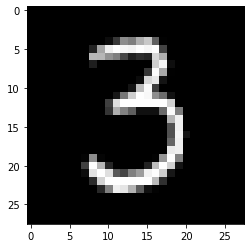

In [32]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()      
print(Y[50])
drawImg(X[50])

In [33]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,querypoint, k =5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(querypoint, X[i])
        vals.append((d, Y[i]))

    vals = sorted(vals)

    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)

    index = new_vals[1].argmax()
    prediction = new_vals[0][index]

    return prediction


In [39]:
testDf = pd.read_csv('mnist_test.csv')
testdata = df.values
X_test = testdata[:, 1:]
Y_test = testdata[:, 0]
X_test.shape

(60000, 784)

0


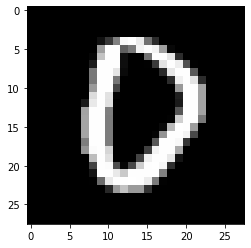

0
1


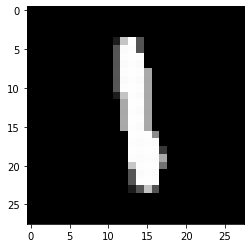

1


In [43]:

for i in range(2):
    num = np.random.randint(1,1000)
    pred = knn(X, Y, X_test[num])

    print(int(pred))
    drawImg(X_test[num])
    print(Y_test[num])
